# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexanderkelso/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")
load_dotenv()
type(api_key)

str

In [3]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
btc_news['articles'][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/richard-lawler',
 'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
 'description': "You can't buy a Tesla with Bitcoin anymore..",
 'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
 'publishedAt': '2021-05-12T22:17:08Z',
 'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'}

In [6]:
btc_news['articles'][0]['title']

"Tesla 'suspends' Bitcoin car purchases citing environmental impact"

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [8]:
eth_news['articles'][0]['title']

'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund'

# SANDBOX
************************************

In [9]:
# test_sentiment = {}
test_sentiment = []

In [10]:
test_article_1 = btc_news['articles'][0]


In [11]:
content_test = test_article_1['content']
content_test

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'

In [12]:
polarity_score = analyzer.polarity_scores(content_test)
polarity_score

{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3818}

In [13]:
test1_positive = polarity_score['pos']
test1_neutral = polarity_score['neu']
test1_negative = polarity_score['neg']
test1_compound = polarity_score['compound']
print (f'Positive: {test1_positive}, Negative: {test1_neutral}, Negative: {test1_negative}, Compound: {test1_compound}')

Positive: 0.071, Negative: 0.929, Negative: 0.0, Compound: 0.3818


In [14]:
test_sentiment.append({
    # "Content": content_test, 
    "Positive": test1_positive, 
    "Neutral": test1_neutral,
    "Negative": test1_negative, 
    "Compound": test1_compound 
})

test_sentiment

[{'Positive': 0.071, 'Neutral': 0.929, 'Negative': 0.0, 'Compound': 0.3818}]

***************************************************************************

# BACK TO IT:. BITCOIN
************************************

In [15]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiment = []

for headlines in btc_news["articles"]:
    try:
        content = headlines["content"]
        polarity_scores = analyzer.polarity_scores(content)
        positive = polarity_scores["pos"]
        neutral = polarity_scores["neu"]
        negative = polarity_scores["neg"]
        compound = polarity_scores["compound"]

        btc_sentiment.append({
            "Content": content,
            "Compound": compound,
            "Positive": positive,
            "Neutral": neutral,
            "Negative": negative,
        })
    except AttributeError:
        pass

btc_sentiment[-1]

{'Content': 'By Reuters Staff\r\nMay 12 (Reuters) - Tesla Inc has suspended the use of bitcoin to purchase vehicles, Chief Executive Officer Elon Musk said in a tweet, citing concerns about use of fossil fuel for b… [+56 chars]',
 'Compound': -0.4767,
 'Positive': 0.0,
 'Neutral': 0.919,
 'Negative': 0.081}

In [16]:
len(btc_sentiment)

20

In [17]:
btc_dataframe  = pd.DataFrame(btc_sentiment)
btc_dataframe.head()

,Content,Compound,Positive,Neutral,Negative
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.929,0.00
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.00
2,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.00
3,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.00
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.816,0.05


# ONTO ETHEREUM
************************************

In [18]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiment = []

for headlines in eth_news["articles"]:
    try:
        content = headlines["content"]
        polarity_scores = analyzer.polarity_scores(content)
        positive = polarity_scores["pos"]
        neutral = polarity_scores["neu"]
        negative = polarity_scores["neg"]
        compound = polarity_scores["compound"]

        eth_sentiment.append({
            "Content": content,
            "Compound": compound,
            "Positive": positive,
            "Neutral": neutral,
            "Negative": negative,
        })
    except AttributeError:
        pass

eth_sentiment[-1]

{'Content': 'Ethereum has outperformed major digital currency rivals this year, bolstered by the surge in decentralized finance (DeFi) and the anticipation of a technical adjustment this summer, but it faces hurd… [+5218 chars]',
 'Compound': 0.0516,
 'Positive': 0.038,
 'Neutral': 0.962,
 'Negative': 0.0}

In [19]:
eth_dataframe  = pd.DataFrame(eth_sentiment)
eth_dataframe.tail()

,Content,Compound,Positive,Neutral,Negative
15,Posted \r\nThe S&amp;P Dow Jones Indices launc...,0.1280,0.049,0.951,0.0
16,Sotheby's said on Tuesday it would accept bitc...,0.8176,0.210,0.790,0.0
17,"NEW YORK, May 7 (Reuters) - Ethereum has outpe...",0.1027,0.046,0.954,0.0
18,By Reuters Staff\r\n(Adds detail of reported E...,0.0000,0.000,1.000,0.0
19,Ethereum has outperformed major digital curren...,0.0516,0.038,0.962,0.0


# NEXT PART
******************************

In [20]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_dataframe.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.325535,0.087700,0.899500,0.012850
std,0.349802,0.075245,0.080753,0.026867
min,-0.476700,0.000000,0.777000,0.000000
25%,0.000000,0.000000,0.824750,0.000000
50%,0.342950,0.071000,0.924000,0.000000
75%,0.634375,0.160250,0.974500,0.000000
max,0.845500,0.217000,1.000000,0.081000


In [21]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_dataframe.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.00000,20.000000
mean,0.131840,0.044850,0.94590,0.009250
std,0.285022,0.058756,0.06369,0.029097
min,-0.340000,0.000000,0.79000,0.000000
25%,0.000000,0.000000,0.92400,0.000000
50%,0.012900,0.036000,0.95800,0.000000
75%,0.238025,0.060500,1.00000,0.000000
max,0.817600,0.210000,1.00000,0.111000


# QUESTIONS
************************

## Q: Which coin had the highest mean positive score? <br>
<br>

A: <br>
BTC's mean positive sentiment scored: 0.087700 <br>
ETH's mean positive sentiment scored: 0.043850 <br>
Therefore BTC scored higher today



## Q: Which coin had the highest compound score?


A: <br>
BTC's mean compound score was: 0.325535 <br>
ETH's mean compound score was: 0.119885 <br>
Therefore BTC scored higher today


## Q. Which coin had the highest positive score?

A: BTC is the overall winner today

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [23]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer() 
lemmatizer

<WordNetLemmatizer>

In [24]:
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
len(stop)

179

In [25]:
#  Expand the default stopwords list if necessary
# YOUR CODE HERE!
# Will come back to this if the results are weird.
stop.append(',')
stop.append('``')
stop.append('.')
stop.append('[')
stop.append('+768')
stop.append("''")
stop.append('char')
stop.append('\r')
stop.append('\n')
stop.append('ha')
stop.append('chars')


# SANDBOX
************************

In [62]:
# Pull test string to experiment
article_words_test =  btc_dataframe['Content'][0]
article_words_test

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'

In [63]:
article_words_test[0]

'J'

In [64]:
#TOKENIZE FIRST, IT'S JUST EASIER
tokenized_words = word_tokenize(article_words_test)
tokenized_words[0]

'Just'

In [65]:
len(tokenized_words)

44

In [66]:
## PUNCTUATED
punctuated = list(filter(lambda x: x not in punctuation, tokenized_words))
len(punctuated)

39

In [67]:
## LEMATIZED
lematized_words = [lemmatizer.lemmatize(word) for word in punctuated]
len(lematized_words)

39

In [68]:
# ^^ Not really sure if that worked, but it should based on the code syntax.... maybe try with a different headline

In [69]:
# LOWERCASE
lower_word_list = [token.lower() for token in lematized_words]
lower_word_list[0]

'just'

In [70]:
len(lower_word_list)

39

In [71]:
#REMOVE STOPS
removed_stops = list(filter(lambda p: p.lower() not in stop, lower_word_list))
len(removed_stops)

19

In [72]:
removed_stops

['week',
 'tesla',
 'started',
 'accepting',
 'bitcoin',
 'currency',
 'car',
 'elon',
 'musk',
 'revealed',
 'tweet',
 'suspend',
 'effort',
 'according',
 'release',
 'tesla',
 'doe',
 'appear',
 'funct…']

# BACK TO IT
************************

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words ##########
    tokenized_words = word_tokenize(text)

   
    # Remove the punctuation from text
    punctuated_words = list(filter(lambda x: x not in punctuation, tokenized_words))
    
    
    # Lemmatize words into root words
    lematized_words = [lemmatizer.lemmatize(word) for word in punctuated_words]

   
    # Convert the words to lowercase
    lower_words = [token.lower() for token in lematized_words]
    
    
    # Remove the stop words
    removed_stops = list(filter(lambda p: p.lower() not in stop, lower_words))
    
    
    return removed_stops

In [38]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_dataframe.head()

,Content,Compound,Positive,Neutral,Negative
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.929,0.00
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.942,0.00
2,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,1.000,0.00
3,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.829,0.00
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.816,0.05


In [39]:
# btc_dataframe['tokens']
btc_dataframe["Tokens"] = btc_dataframe.Content.apply(tokenizer)
btc_dataframe.tail()

,Content,Compound,Positive,Neutral,Negative,Tokens
15,The two founders of Crusoe Energy think they m...,0.4215,0.158,0.777,0.066,"[two, founder, crusoe, energy, think, may, sol..."
16,"Elon Musk really, REALLY likes Dogecoin. \r\nA...",0.7434,0.179,0.821,0.000,"[elon, musk, really, really, like, dogecoin, e..."
17,We're going to the moon. \r\nThe proponents of...,0.7343,0.179,0.821,0.000,"['re, going, moon, proponent, dogecoin, doge, ..."
18,By Reuters Staff\r\nApril 12 (Reuters) - Micro...,0.0000,0.000,1.000,0.000,"[reuters, staff, april, 12, reuters, microstra..."
19,By Reuters Staff\r\nMay 12 (Reuters) - Tesla I...,-0.4767,0.000,0.919,0.081,"[reuters, staff, may, 12, reuters, tesla, inc,..."


In [40]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_dataframe["Tokens"] = eth_dataframe.Content.apply(tokenizer)
eth_dataframe.tail()

,Content,Compound,Positive,Neutral,Negative,Tokens
15,Posted \r\nThe S&amp;P Dow Jones Indices launc...,0.1280,0.049,0.951,0.0,"[posted, amp, p, dow, jones, indices, launched..."
16,Sotheby's said on Tuesday it would accept bitc...,0.8176,0.210,0.790,0.0,"[sotheby, 's, said, tuesday, would, accept, bi..."
17,"NEW YORK, May 7 (Reuters) - Ethereum has outpe...",0.1027,0.046,0.954,0.0,"[new, york, may, 7, reuters, ethereum, outperf..."
18,By Reuters Staff\r\n(Adds detail of reported E...,0.0000,0.000,1.000,0.0,"[reuters, staff, adds, detail, reported, eib, ..."
19,Ethereum has outperformed major digital curren...,0.0516,0.038,0.962,0.0,"[ethereum, outperformed, major, digital, curre..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [41]:
from collections import Counter
from nltk import ngrams

In [42]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
btc_ngrams = ngrams(tokenizer(btc_dataframe.Content.str.cat()), N)
Counter(btc_ngrams).most_common(10)

[(('elon', 'musk'), 5),
 (('accepting', 'bitcoin'), 3),
 (('said', 'monday'), 3),
 (('reuters', 'staff'), 3),
 (('venmo', 'app'), 2),
 (('fossil', 'fuel'), 2),
 (('ceo', 'elon'), 2),
 (('price', 'continued'), 2),
 (('institutional', 'investor'), 2),
 (('inc', 'major'), 2)]

In [43]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
eth_ngrams = ngrams(tokenizer(eth_dataframe.Content.str.cat()), N)
Counter(eth_ngrams).most_common(10)

[(('bitcoin', 'ethereum'), 3),
 (('reuters', 'staff'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'ethereum'), 3),
 (('ethereum', 'seen'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'illustration'), 3)]

In [44]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_btc_tokens = tokenizer(btc_dataframe.Content.str.cat())
token_count(top_btc_tokens, 10)

[('bitcoin', 17),
 ('tesla', 10),
 ('musk', 7),
 ('cryptocurrency', 7),
 ('reuters', 6),
 ('elon', 5),
 ('company', 4),
 ('monday', 4),
 ('service', 4),
 ('said', 4)]

In [46]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_eth_tokens = tokenizer(eth_dataframe.Content.str.cat())
token_count(top_eth_tokens, 10)

[('ethereum', 11),
 ('cryptocurrency', 6),
 ('bitcoin', 6),
 ('reuters', 6),
 ('currency', 6),
 ('stock', 5),
 ('project', 4),
 ('major', 4),
 ('ether', 4),
 ('monday', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [48]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(word, title=""):
    df_cloud = WordCloud(width=400, colormap='YlGnBu').generate(word)
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.axis("off")
    plt.imshow(df_cloud)
    plt.title(title, fontdict=fontdict)
    plt.show()

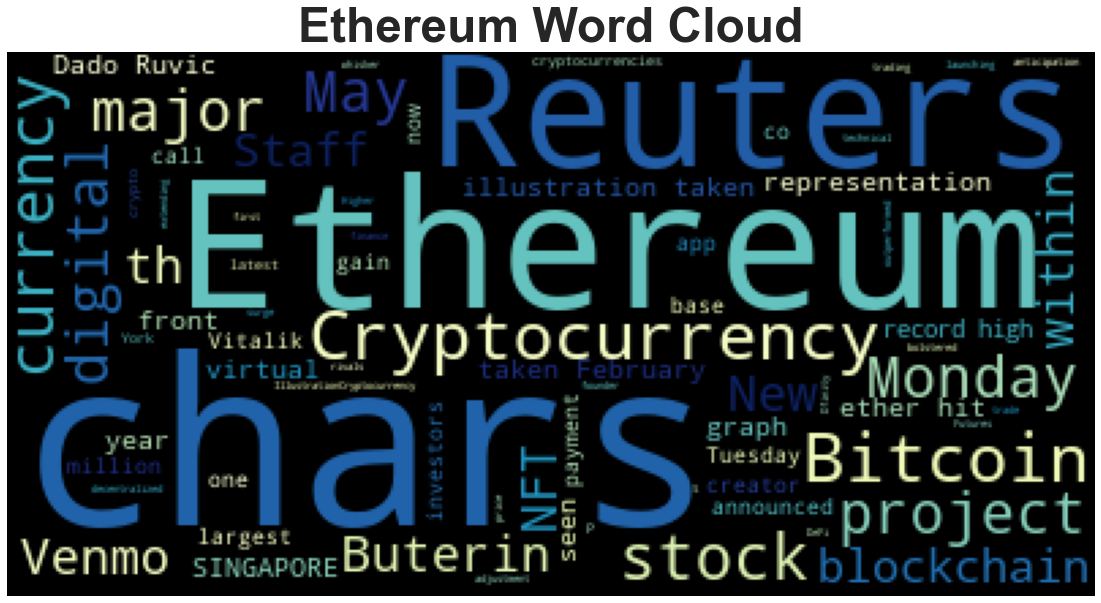

In [49]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_words = eth_dataframe.Content.str.cat()
wordcloud(eth_words, title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [50]:
import spacy
from spacy import displacy

In [51]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp

---
### Bitcoin NER

In [53]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_string = btc_dataframe.Content.str.cat()
btc_string[0]

'J'

In [54]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_document = nlp(btc_string)
btc_document[0]

Just

In [55]:
# Add a title to the document
# YOUR CODE HERE!
btc_document.user_data['title'] = "Bitcoin"

In [56]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_document, style='ent', jupyter=True)

In [57]:
# List all Entities
# YOUR CODE HERE!
for entity in btc_document.ents:
    text = entity.text
    label = entity.label_
    print (f"{text}: {label}")

Just weeks: DATE
Tesla: ORG
Bitcoin: PERSON
Elon Musk: PERSON
Square: FAC
more than 6%: PERCENT
today: DATE
American: NORP
$5.06 billion: MONEY
2021: DATE
3.36: MONEY
CFO: ORG
Zach Kirkhorn: PERSON
Monday: DATE
PayPal: ORG
Bitcoin, Ethereum: ORG
Bitcoin Cash: PERSON
Litecoin: PERSON
Venmo: PERSON
70 million: CARDINAL
Tesla: ORG
Elon Musk: PERSON
Friday: DATE
Bitcoin: PERSON
50,000: MONEY
first: ORDINAL
early March: DATE
Bitcoin: PERSON
a momentous year: DATE
2020: DATE
Zuckerberg: PERSON
two: CARDINAL
Max: PERSON
Bitcoin: PERSON
Elon Musk: PERSON
March: DATE
Musk: PERSON
Tesla: PERSON
Earlier this year: DATE
EV: ORG
1.5: MONEY
Musk: PERSON
Tesla: PERSON
Tesla: PERSON
first quarter: DATE
$438m: MONEY
315: MONEY
Bitcoin: ORG
Jack Dorsey: PERSON
Babel Finance: ORG
Monday: DATE
Tuesday: DATE
Venmo: PERSON
Four: CARDINAL
chars]New York: GPE
CNN: ORG
Saturday: DATE
about 6%: PERCENT
nearly $58,000: MONEY
Reuters: ORG
Reuters: ORG
Inc: PERSON
Monday: DATE
two: CARDINAL
Crusoe Energy: ORG
two:

---

### Ethereum NER

In [58]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_string = eth_dataframe.Content.str.cat()

In [59]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_document = nlp(eth_string)
# Add a title to the document
# YOUR CODE HERE!
eth_document.user_data['title'] = "Ethereum"

In [60]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_document, style='ent', jupyter=True)

In [61]:
# List all Entities
# YOUR CODE HERE!
for entity in eth_document.ents:
    text = entity.text
    label = entity.label_
    print (f"{text}: {label}")

Vitalik Buterin: PERSON
Ethereum: ORG
Wednesday: DATE
Ethereum: ORG
$1.5 billion: MONEY
Buterin: PERSON
500: CARDINAL
ETH: ORG
North Carolina: GPE
Josh Stein: PERSON
Madison Campbell: PERSON
Liesel Vaidya: PERSON
PayPal: ORG
Bitcoin, Ethereum: ORG
Bitcoin Cash: PERSON
Litecoin: PERSON
Venmo: PERSON
70 million: CARDINAL
Tuesday: DATE
Venmo: PERSON
Four: CARDINAL
chars]New York: GPE
CNN: ORG
Saturday: DATE
about 6%: PERCENT
nearly $58,000: MONEY
CryptoPunks: ORG
one: CARDINAL
NFT: ORG
Meebits: PRODUCT
20,000: CARDINAL
3D: ORG
Ethereum: ORG
$65 million: MONEY
J.P. Morgan: PERSON
Mastercard: PERSON
UBS AG: ORG
Reuters: ORG
February 19, 2021: DATE
SINGAPORE: GPE
February 19, 2021: DATE
Dado Ruvic/IllustrationCryptocurrency: PERSON
Dfinity: ORG
July 2018: DATE
Swiss: NORP
Dominic Williams: PERSON
StockMarketUS Stock Futures Edge Higher: ORG
Monday: DATE
U.S.: GPE
Monday: DATE
Topps: GPE
first: ORDINAL
NFT: ORG
Spanish: NORP
AI: ORG
Cryptocurrencies: ORG
today: DATE
Vitalik Buterin: PERSON
27

---